In [31]:
import  pandas as pd
from termcolor import colored as cl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [16,7]

In [32]:
df = sns.load_dataset('iris')
print(cl(df, attrs=['bold']))

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [33]:
print(cl(df.describe(), attrs=['bold']))

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [34]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

f:\python3.9.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


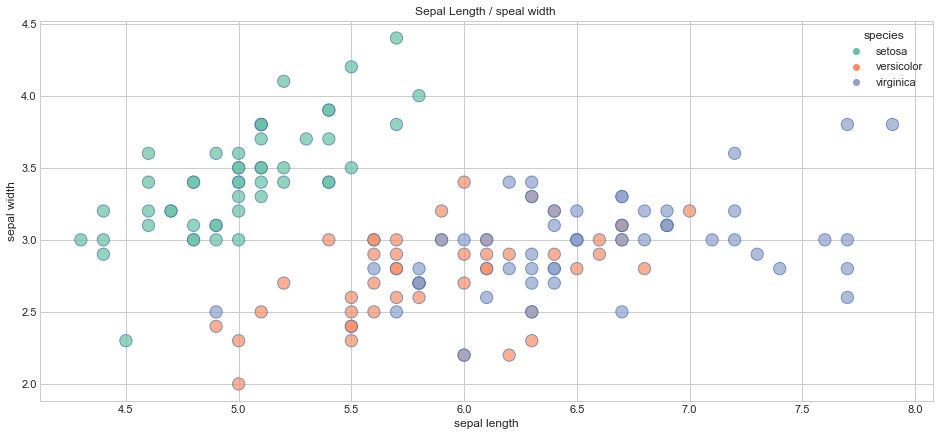

In [35]:
sns.scatterplot('sepal_length','sepal_width',
                data=df,hue='species',palette='Set2',edgecolor = 'b',s = 150,alpha=0.7)
plt.title('Sepal Length / speal width ')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.savefig('sepqliris.png')

f:\python3.9.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


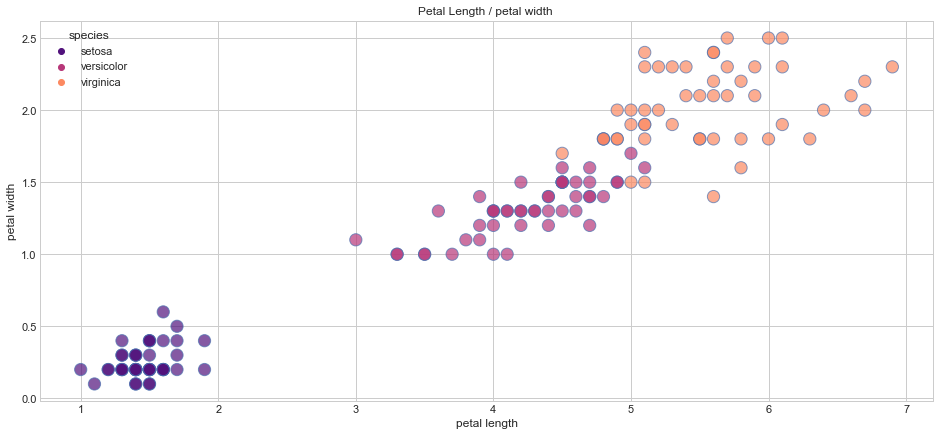

In [36]:
sns.scatterplot('petal_length','petal_width',
                data=df,hue='species',palette='magma',edgecolor = 'b',s = 150,alpha=0.7)
plt.title('Petal Length / petal width ')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.savefig('petaliris.png')

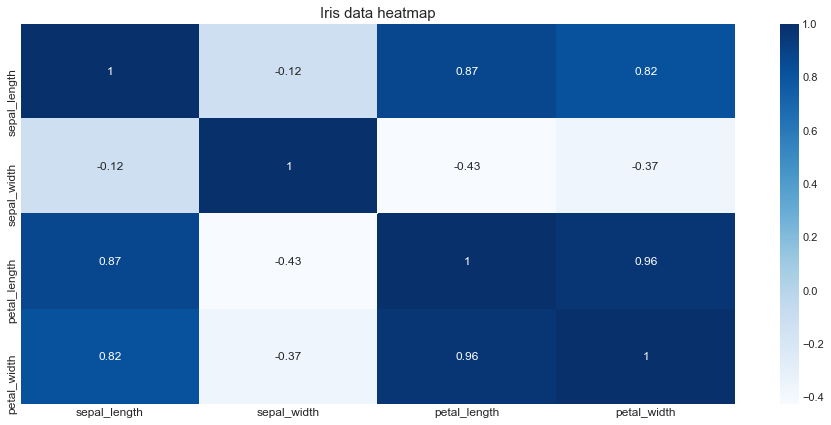

In [37]:
df_corr = df.corr()
sns.heatmap(df_corr,cmap='Blues',annot = True,
            xticklabels=df_corr.columns.values,yticklabels=df_corr.columns.values)
plt.title('Iris data heatmap', fontsize = 15)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.savefig('irisheatmap.png')

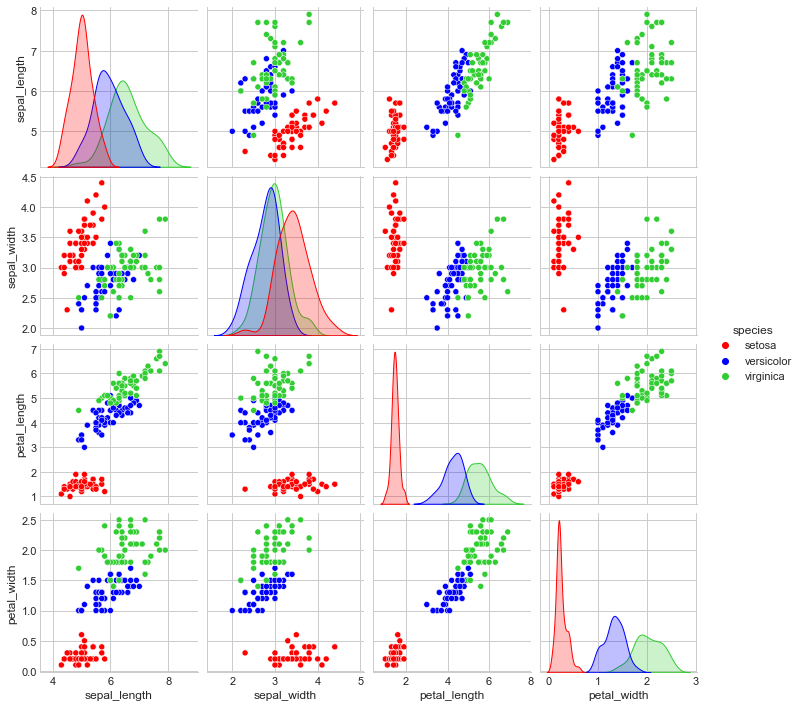

In [38]:
sns.pairplot(data=df,hue='species',palette=['Red','Blue','limegreen'])
plt.savefig('pairiris.png')

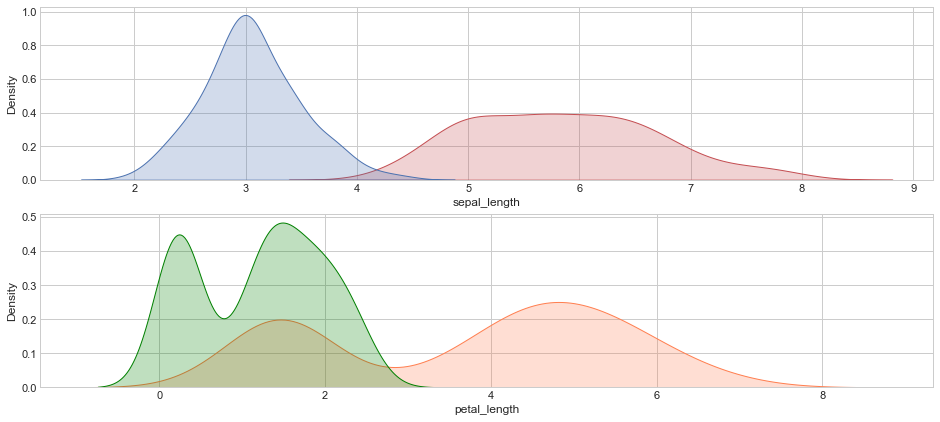

In [39]:
plt.subplot(211)
sns.kdeplot(df['sepal_length'],color='r',shade = True,label = 'Sepal Length')
sns.kdeplot(df['sepal_width'],color='b',shade = True,label = 'Sepal Width')

plt.subplot(212)
sns.kdeplot(df['petal_length'],color='coral',shade = True,label = 'Petal Length')
sns.kdeplot(df['petal_width'],color='green',shade = True,label = 'Petal Width')
plt.savefig('dist1.png')

In [40]:
x_var = df[['sepal_length','sepal_width','petal_length','petal_width']].values
y_var = df['species'].values

print(cl('X variable: ',attrs=['bold']),x_var[:5])
print(cl('Y variable: ',attrs=['bold']),y_var)

X variable:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Y variable:  ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor'

In [41]:
x_var1 = x_var
x_var = StandardScaler().fit(x_var).transform(x_var.astype(float))
print(cl(x_var[:5],attrs = ['bold']))


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [42]:
x_train, x_test, y_train,y_test = train_test_split(x_var,y_var,test_size = 0.3,random_state=0)
print(cl('Train set shape:', attrs = ['bold']),x_train.shape,y_train.shape)
print(cl('Train set shape:', attrs = ['bold']),x_test.shape,y_test.shape)

Train set shape: (105, 4) (105,)
Train set shape: (45, 4) (45,)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x_train,y_train)
print(cl(clf,attrs=['bold']))

KNeighborsClassifier(n_neighbors=3)


In [44]:
yhat = clf.predict(x_test)
print(cl("Prediction Accuracy Score(%):", attrs = ['bold']),round(accuracy_score(y_test,yhat)*100,2))

Prediction Accuracy Score(%): 97.78


In [45]:
clf.predict([[5.1, 3.5, 1.4, 0.2]])

array(['virginica'], dtype=object)

In [46]:
x_var1[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [47]:
x_var[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [48]:
import  numpy as np
def Z_scoreNormalization(x,m,sigm):
    x= (x-m)/sigm;
    return x;

# b = np.array([[5.1, 3.5, 1.4, 0.2]])
b = df[['sepal_length','sepal_width','petal_length','petal_width']].values
print(b[:5])
mean = np.mean(b, axis=0)
std = np.std(b, axis=0)
b = Z_scoreNormalization(b,mean,std)
b[:1]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ]])

In [49]:
clf.predict(b[:1])

array(['setosa'], dtype=object)

In [50]:
clf.predict([[5.1, 3.5, 1.4, 0.2]])

array(['virginica'], dtype=object)

In [51]:
from sklearn.preprocessing import StandardScaler
import numpy as np
x_np = np.array([[5.1, 3.5, 1.4, 0.2]])
x_np =x_np.reshape(-1,1)
scaler = StandardScaler()
x_tran = scaler.fit_transform(x_np)
print(x_tran)

[[ 1.351023  ]
 [ 0.5033223 ]
 [-0.60928488]
 [-1.24506042]]


In [52]:
clf.predict([[1.351023,0.5033223,-0.60928488,-1.24506042]])

array(['versicolor'], dtype=object)

In [53]:
clf.predict(x_tran.reshape(1,-1))

array(['versicolor'], dtype=object)